<a href="https://colab.research.google.com/github/sebasmos/workshops/blob/main/workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 1️⃣ EDA & Study Design

**🎨 Team 5**

`Add your team number above`

**👥 Authors**

`Add your names here (alphabetically)`


* Beatrice
* Chris
* François
* Joe
* Michael
* Ricardo
* Tristan

**🎯 Goals of this Workshop**
1. Define Inclusion Criteria to build a working cohort
2. Explore the Ground-Truths, present in the data set


**✏️ Expected Deliverables**
1. Flow chart with inclusion and exclusion criteria, reporting who's being left out, by demographics
2. Define the Machine Learning Task to be addressed



**❗ Highlighted Pitfall(s)**
* Sampling and Representation Bias

## 0. Understand the Problem and Dataset

Please go through [Workshop 0](https://colab.research.google.com/gist/joamats/08338a27a51c02179f3d5e8b8f15cecb/workshop_0.ipynb) for an Introduction on the Problem, Dataset and Objective of the Datathon. As the Datathon schedule is very tight, this should be studied prior to attending the Event.


## 1. Inclusion/exclusion Criteria Definition

In discussion between Data Scientists and Clinicians, try to answer these questions:
* What is a reasonable $SaO_2$ and $SpO_2$ cut-off value to avoid aberrant values and venous blood gas value?
* What is a reasonable time offset between $SaO_2$ and $SpO_2$ to create a pair?
* Are there patients from any demographics or with certain comorbidities that should not be included?
* Is there any specific treatment information that may influence?
* How to deal with multiple pairs per patient?


When taking these decisions, keep these into consideration:
* Are we keeping a reasonable amount of patients?
* What are the consequences of these decisions if we were to implement the result of this project in a real setting?
* Are we seggregating any group of patients?
* Are there groups that are more likely to be dropped in any approach and could introduce sampling selection bias?


### ✏️ Discussed Criteria
`Fill in with the ones you come up with as a team `

* 
* 

## 2. Study Cohort Creation

**What is a Flowchart in this context?**

A Flowchart reflects the study cohort creation, by selecting the patients that best suit our study design.

It is a helpful tool to visualize the numbers after applying our inclusion and exclusion criteria.

**Example (part of one):**

<div>
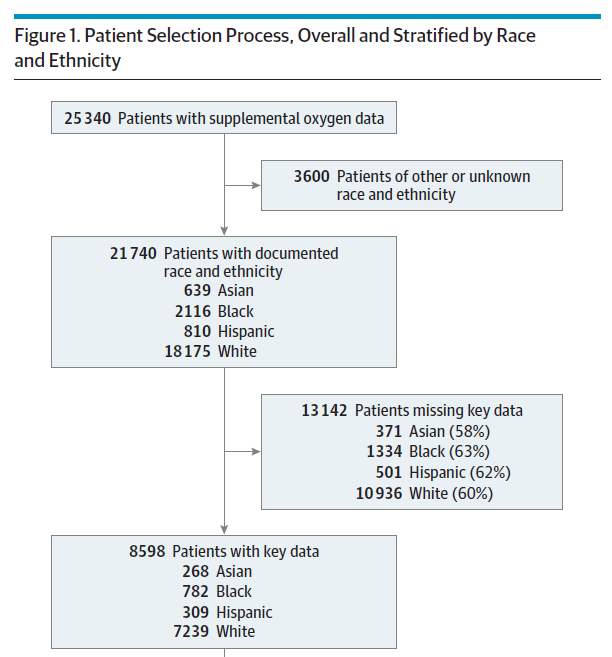
</div>

**Source:**
Gottlieb ER, Ziegler J, Morley K, Rush B, Celi LA. Assessment of Racial and Ethnic Differences in Oxygen Supplementation Among Patients in the Intensive Care Unit. JAMA Intern Med. 2022;182(8):849–858. https://doi:10.1001/jamainternmed.2022.2587

### ✏️ Initial Exploratory Data Analysis (EDA)

`Create code below to answer the following questions`



In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/mit-critical-datathon-2023/mimic_pulseOx_data.csv")
df

,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,...,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,F,1,...,-3,96.0,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm)
1,10001884,37510196,2131-01-13 02:28:00,92.0,-28,94,0,26184834,F,1,...,-27,98.0,-28.0,22.0,92.0,36.56,121.0,199.0,-28.0,SR (Sinus Rhythm)
2,10002013,39060235,2160-05-18 16:03:00,99.0,0,99,0,23581541,F,1,...,-3,86.5,-2.0,14.0,-3.0,36.90,0.0,155.0,-3.0,SR (Sinus Rhythm)
3,10002013,39060235,2160-05-18 17:42:00,96.0,-42,97,0,23581541,F,1,...,18,73.0,18.0,23.0,18.0,36.70,0.0,149.0,18.0,ST (Sinus Tachycardia)
4,10002013,39060235,2160-05-18 21:32:00,97.0,-32,98,0,23581541,F,1,...,28,86.0,28.0,18.0,28.0,37.50,0.0,141.0,28.0,SR (Sinus Rhythm)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81792,19999287,35165301,2197-08-07 02:12:00,97.0,-12,98,0,20175828,F,1,...,-12,83.0,-12.0,16.0,108.0,36.89,-12.0,129.0,-12.0,1st AV (First degree AV Block)
81793,19999840,38978960,2164-09-13 20:51:00,97.0,-51,98,0,21033226,M,0,...,9,79.0,9.0,16.0,-51.0,37.17,69.0,162.0,9.0,SR (Sinus Rhythm)
81794,19999840,38978960,2164-09-15 16:30:00,95.0,-30,94,0,21033226,M,0,...,-18,59.0,-30.0,14.5,-30.0,35.50,20.0,132.0,30.0,SR (Sinus Rhythm)
81795,19999840,38978960,2164-09-17 08:11:00,93.0,-11,93,0,21033226,M,0,...,-11,71.0,-11.0,23.0,-11.0,36.78,0.0,166.0,-11.0,SR (Sinus Rhythm)


In [ ]:
cleaned_df = df[(df.SaO2 >= 50) & (df.SaO2 <= 100)]
cleaned_df = cleaned_df[(cleaned_df.SpO2 >= 50) & (cleaned_df.SpO2 <= 100)].reset_index()
cleaned_df

,index,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,...,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
0,0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,F,...,-3,96.0,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm)
1,1,10001884,37510196,2131-01-13 02:28:00,92.0,-28,94,0,26184834,F,...,-27,98.0,-28.0,22.0,92.0,36.56,121.0,199.0,-28.0,SR (Sinus Rhythm)
2,2,10002013,39060235,2160-05-18 16:03:00,99.0,0,99,0,23581541,F,...,-3,86.5,-2.0,14.0,-3.0,36.90,0.0,155.0,-3.0,SR (Sinus Rhythm)
3,3,10002013,39060235,2160-05-18 17:42:00,96.0,-42,97,0,23581541,F,...,18,73.0,18.0,23.0,18.0,36.70,0.0,149.0,18.0,ST (Sinus Tachycardia)
4,4,10002013,39060235,2160-05-18 21:32:00,97.0,-32,98,0,23581541,F,...,28,86.0,28.0,18.0,28.0,37.50,0.0,141.0,28.0,SR (Sinus Rhythm)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81599,81791,19998843,30988867,2187-02-06 05:11:00,98.0,-11,100,0,24842066,M,...,-11,76.0,-11.0,27.0,-11.0,38.90,0.0,142.0,-11.0,SR (Sinus Rhythm)
81600,81792,19999287,35165301,2197-08-07 02:12:00,97.0,-12,98,0,20175828,F,...,-12,83.0,-12.0,16.0,108.0,36.89,-12.0,129.0,-12.0,1st AV (First degree AV Block)
81601,81793,19999840,38978960,2164-09-13 20:51:00,97.0,-51,98,0,21033226,M,...,9,79.0,9.0,16.0,-51.0,37.17,69.0,162.0,9.0,SR (Sinus Rhythm)
81602,81794,19999840,38978960,2164-09-15 16:30:00,95.0,-30,94,0,21033226,M,...,-18,59.0,-30.0,14.5,-30.0,35.50,20.0,132.0,30.0,SR (Sinus Rhythm)


array([[<Axes: title={'center': 'SaO2'}>]], dtype=object)

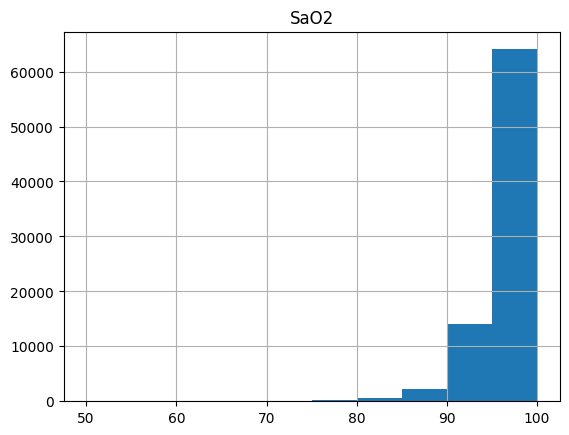

In [ ]:
# df['SaO2'].plot()
# import matplotlib.pyplot as plt
cleaned_df.hist(column='SaO2')

How many patients do we have per racial-ethnic group, sex, and other demographics?

In [ ]:
# Code here!
import matplotlib.pyplot as plt

cleaned_merged_df = cleaned_df.drop_duplicates('subject_id').reset_index()
demo_dict = dict(cleaned_merged_df[['race_group', 'gender']].value_counts())
demo_dict
# # print()
# # plt.hist((df['race_group']))

{('White', 'M'): 6367,
 ('White', 'F'): 3547,
 ('Other', 'M'): 1663,
 ('Other', 'F'): 972,
 ('Black', 'F'): 523,
 ('Black', 'M'): 511,
 ('Hispanic', 'M'): 285,
 ('Asian', 'M'): 215,
 ('Hispanic', 'F'): 179,
 ('Asian', 'F'): 113}

In [1]:
!pip install tableone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from tableone import TableOne

TableOne(df, columns=['race_group', 'gender'], categorical=['race_group', 'gender'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing       Overall
n                                          81797
race_group, n (%) Asian          0    2234 (2.7)
                  Black               5644 (6.9)
                  Hispanic            2821 (3.4)
                  Other             15892 (19.4)
                  White             55206 (67.5)
gender, n (%)     F              0  28903 (35.3)
                  M                 52894 (64.7)

What is the $SaO_2$ / $SpO_2$ measurement values range?


In [ ]:
# Code here!

SaO2 and SpO2 filtered to 50 - 100.

What is the typical $SaO_2$ - $SpO_2$ time offset?

In [ ]:
thresh = cleaned_df.delta_SpO2.median()

# Code here!
print('Initial: ', cleaned_df.subject_id.nunique())
print('Less than 60 mins: ', cleaned_df[cleaned_df.delta_SpO2 > -60].subject_id.nunique(), '\n                   ',    len(cleaned_df[cleaned_df.delta_SpO2 > -60].subject_id))
print('Less than 45 mins: ', cleaned_df[cleaned_df.delta_SpO2 > -45].subject_id.nunique(), '\n                   ',    len(cleaned_df[cleaned_df.delta_SpO2 > -45].subject_id))
print('Less than 30 mins: ', cleaned_df[cleaned_df.delta_SpO2 > -30].subject_id.nunique(), '\n                   ',    len(cleaned_df[cleaned_df.delta_SpO2 > -30].subject_id))
print('Less than 15 mins: ', cleaned_df[cleaned_df.delta_SpO2 > -15].subject_id.nunique(), '\n                   ',    len(cleaned_df[cleaned_df.delta_SpO2 > -15].subject_id))

print(f'Less than {abs(thresh)} mins: ', cleaned_df[cleaned_df.delta_SpO2 > thresh].subject_id.nunique(), '\n                   ',    len(cleaned_df[cleaned_df.delta_SpO2 > thresh].subject_id))

Initial:  14375
Less than 60 mins:  14240 
                    80481
Less than 45 mins:  13222 
                    65667
Less than 30 mins:  11728 
                    48898
Less than 15 mins:  9000 
                    27144
Less than 24.0 mins:  10886 
                    40791


In [ ]:
cleaned_2_df = cleaned_df[cleaned_df.delta_SpO2 > thresh].reset_index()
cleaned_2_df

,level_0,index,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,...,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
0,0,0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,...,-3,96.0,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm)
1,2,2,10002013,39060235,2160-05-18 16:03:00,99.0,0,99,0,23581541,...,-3,86.5,-2.0,14.0,-3.0,36.90,0.0,155.0,-3.0,SR (Sinus Rhythm)
2,7,7,10002428,38875437,2156-04-19 19:41:00,96.0,-11,94,0,28662225,...,10,98.0,4.0,22.0,-56.0,37.00,2.0,183.0,19.0,ST (Sinus Tachycardia)
3,8,8,10002428,38875437,2156-04-20 00:46:00,97.0,0,100,0,28662225,...,-1,68.0,-1.0,18.0,14.0,36.94,164.0,163.0,14.0,SR (Sinus Rhythm)
4,9,9,10002428,38875437,2156-04-20 03:42:00,97.0,-16,98,0,28662225,...,3,77.0,3.0,20.0,18.0,37.39,-12.0,163.0,18.0,SR (Sinus Rhythm)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40786,81595,81787,19997752,34531437,2128-03-02 17:54:00,97.0,-9,99,0,29452285,...,6,62.0,6.0,17.0,-114.0,36.33,0.0,153.0,6.0,V Paced
40787,81597,81789,19998330,33428243,2178-11-28 07:14:00,95.0,-14,99,0,24096838,...,-14,112.0,-14.0,25.0,46.0,36.50,46.0,175.0,-14.0,AF (Atrial Fibrillation)
40788,81599,81791,19998843,30988867,2187-02-06 05:11:00,98.0,-11,100,0,24842066,...,-11,76.0,-11.0,27.0,-11.0,38.90,0.0,142.0,-11.0,SR (Sinus Rhythm)
40789,81600,81792,19999287,35165301,2197-08-07 02:12:00,97.0,-12,98,0,20175828,...,-12,83.0,-12.0,16.0,108.0,36.89,-12.0,129.0,-12.0,1st AV (First degree AV Block)


Does that offset significantly vary for certain groups?

In [ ]:
# Code here!
cleaned_2_df.groupby(['race_group'])['delta_SpO2'].mean()

race_group
Asian      -10.509186
Black      -10.817787
Hispanic   -11.404062
Other      -11.060676
White      -10.764228
Name: delta_SpO2, dtype: float64

How many pairs do we have per patient?


In [ ]:
# Code here!
grouped_df = cleaned_2_df.copy()
grouped_df['num_pairs'] = 1
grouped_df = grouped_df.groupby('subject_id', as_index=False).agg({'num_pairs': 'sum'})
# grouped_df['num_pairs'] = grouped_df['race_group'].cumsum()
print(f'Mean # Pairs per Patient: {grouped_df.num_pairs.mean()}')

Mean # Pairs per Patient: 3.7471063751607567


In [ ]:
grouped_df

,subject_id,num_pairs
0,10001884,1
1,10002013,1
2,10002428,4
3,10002760,5
4,10004235,3
...,...,...
10881,19997752,2
10882,19998330,1
10883,19998843,1
10884,19999287,1


In [ ]:
grouped_2_df = grouped_df.merge(cleaned_2_df[['subject_id', 'race_group']].drop_duplicates('subject_id'), on='subject_id', how='left')
grouped_2_df

,subject_id,num_pairs,race_group
0,10001884,1,Black
1,10002013,1,Other
2,10002428,4,White
3,10002760,5,Other
4,10004235,3,Black
...,...,...,...
10881,19997752,2,White
10882,19998330,1,Black
10883,19998843,1,Other
10884,19999287,1,Black


In [ ]:
grouped_2_df[grouped_2_df.race_group == 'Asian'].num_pairs.describe()

count    249.000000
mean       4.578313
std       10.273031
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       86.000000
Name: num_pairs, dtype: float64

Are there groups with different no. pairs?

In [ ]:
# Code here!
grouped_2_df.groupby(['race_group'])['num_pairs'].mean()

race_group
Asian       4.578313
Black       3.611257
Hispanic    4.135593
Other       4.031584
White       3.641345
Name: num_pairs, dtype: float64

These questions are mere examples. Which other questions are relevant?

In [ ]:
# Code here!
cleaned_2_df['SpO2_error'] = cleaned_2_df['SaO2'] - cleaned_2_df['SpO2']
cleaned_2_df['SpO2_error']

0        1.0
1        0.0
2        2.0
3       -3.0
4       -1.0
        ... 
40786   -2.0
40787   -4.0
40788   -2.0
40789   -1.0
40790    0.0
Name: SpO2_error, Length: 40791, dtype: float64

In [ ]:
cleaned_2_df.groupby(['race_group', 'gender'])['SpO2_error'].mean()

race_group  gender
Asian       F        -1.863830
            M        -1.578524
Black       F        -1.769580
            M        -1.675761
Hispanic    F        -1.274194
            M        -1.321724
Other       F        -0.960373
            M        -1.070517
White       F        -0.934700
            M        -0.990292
Name: SpO2_error, dtype: float64

In [ ]:
# Code here!

In [ ]:
# Code here!

### ✏️ Apply you Inclusion / Exclusion Criteria

Now that we have done some Initial EDA, let's define criteria for the study cohort selection

**How to identify Sampling and Representation Bias in a systematic way?**

When we apply inclusion / exclusion criteria, it is important to keep track of the patients that are being left out of the study to spotlight points of sampling bias.

We can create a function that gets the demographic information from a dataframe of patients, to be run this each time we apply an exclusion criteria. 

**This is a good practice of study cohort selection!**

In [ ]:
import pandas as pd
from typing import Dict

def get_demography(df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """Get the demography of the cohort.

    Args:
        df (pd.DataFrame): The cohort dataframe.

    Returns:
        dict: A dictionary containing demographic information such as race, sex, 
              and English proficiency, with corresponding proportions.
    """
    demo = {}
    
    demo["race"] = df["race_group"].value_counts(normalize=True).to_dict()

    demo["sex"] = {
        "Male": df["sex_female"].value_counts(normalize=True)[0],
        "Female": df["sex_female"].value_counts(normalize=True)[1]
    }
    
    demo["language"] = df["language"].value_counts(normalize=True).to_dict()

    # You can add other Variables here, following the same structure

    return demo

def print_demo(demo):
    """ Print
      Args:
        dict: A dictionary containing demographic information such as race, sex, 
                English proficiency, ..., with corresponding proportions.
      Returns:
        str: A formatted string to display demographics, that can be printed. 
    """

    demo_str = ""
    for key, value in demo.items():
        if isinstance(value, dict):
            demo_str += f"{key}: ["
            for key2, value2 in value.items():
                demo_str += f"{key2}: {round(value2*100,1)}%, "
            demo_str = demo_str[:-2] + "]\n "
        else:
            demo_str += f"{key}: {round(value*100,1)}%, "
    demo_str = demo_str[:-2]

    return demo_str

  

In [ ]:
# Working Example on the Dataset we just loaded
print(print_demo(get_demography(cleaned_2_df)))

race: [White: 67.8%, Other: 19.1%, Black: 6.8%, Hispanic: 3.5%, Asian: 2.8%]
 sex: [Male: 65.0%, Female: 35.0%]
 language: [ENGLISH: 88.6%, ?: 11.4%]


We suggest this structure to systematically get the numbers to produce a flowchart:
```
# Remove patients XXX
data_1 = data[data.YYY != XXX]
print(f"Removed {len(data) - len(data_1)} patients without XXX")
demo1 = print_demo(get_demography(df1))
print(f"{len(data_1)} stays with ZZZ \n({demo1})\n")

# Remove ... 
data_2 = ...
```



In [ ]:
# Original Data
print(f"{len(df)} overall observations with \n({print_demo(get_demography(df))})\n")

# Exclude patients with SaO2 and SpO2 less than 50% or more than 100%
cleaned_df = df[(df.SaO2 >= 50) & (df.SaO2 <= 100)]
cleaned_df = cleaned_df[(cleaned_df.SpO2 >= 50) & (cleaned_df.SpO2 <= 100)].reset_index()
print(f"{len(cleaned_df)} observations with SaO2 and SpO2 between 50% and 100% \n({print_demo(get_demography(cleaned_df))})\n")

# Exclude patients with deltas greater than the median
cleaned_2_df = cleaned_df[cleaned_df.delta_SpO2 > thresh].reset_index()
print(f"{len(cleaned_2_df)} observations with SpO2 delta less than the median \n({print_demo(get_demography(cleaned_2_df))})\n")

81797 overall observations with 
(race: [White: 67.5%, Other: 19.4%, Black: 6.9%, Hispanic: 3.4%, Asian: 2.7%]
 sex: [Male: 64.7%, Female: 35.3%]
 language: [ENGLISH: 88.6%, ?: 11.4%])

81604 observations with SaO2 and SpO2 between 50% and 100% 
(race: [White: 67.5%, Other: 19.4%, Black: 6.9%, Hispanic: 3.4%, Asian: 2.7%]
 sex: [Male: 64.7%, Female: 35.3%]
 language: [ENGLISH: 88.6%, ?: 11.4%])

40791 observations with SpO2 delta less than the median 
(race: [White: 67.8%, Other: 19.1%, Black: 6.8%, Hispanic: 3.5%, Asian: 2.8%]
 sex: [Male: 65.0%, Female: 35.0%]
 language: [ENGLISH: 88.6%, ?: 11.4%])



`Create a visual diagram and Upload it here:`

`Save your dataframe to be used from now on:`

In [ ]:
cleaned_2_df.to_csv("cleaned_pulseOx_data.csv", index=False)

**MIMIC-IV Demographics (for Comparison with your Cohort)**

This is not exhaustive, but should be if we were to apply this in a real-world scenario!

| Variable                 |          | MIMIC-IV|
|--------------------------|----------|---------|
| **Total Patients**       |          | 50,920|
| **Race-Ethnicity (%)**   | Asian    | 2.94    |
|                          | Black    | 10.9    |
|                          | Hispanic | 3.83    |
|                          | Other    | 14.2    |
|                          | White    | 68.2    |
| **Sex (%)**              | Female   | 44.2    |
| **Proficiency (%)**      | Limited  | 10.2    |


### ✏️ Sampling Selection Bias

Comparing your cohort with MIMIC-IV demographics, what differences can you identify?

`Report and Discuss Sampling Selection Bias:`



* Lower proportion of Black patients in our cohort compared to Mimic IV

* Higher proportion of patients in the racial group 'Other' compared to Mimic IV

* Lower proportion of female patients in our cohort compared to Mimic IV

* Slightly higher proportion of patients in our cohort with limited proficiency in English

**Other Sources of Sampling Selection Bias - Consider this:**

*Black and Hispanic individuals are less likely to receive potentially life-saving cardiopulmonary resuscitation (CPR) from bystanders compared to White individuals, according to a [NEJM study](https://www.nejm.org/doi/full/10.1056/NEJMoa2200798?query=recirc_curatedRelated_article)*.

Garcia, R. A., Spertus, J. A., Girotra, S., Nallamothu, B. K., Kennedy, K. F., McNally, B. F., Breathett, K., Del Rios, M., Sasson, C., & Chan, P. S. (2022). Racial and Ethnic Differences in Bystander CPR for Witnessed Cardiac Arrest. The New England journal of medicine, 387(17), 1569–1578. https://doi.org/10.1056/NEJMoa2200798


**Who does not make it to MIMIC-IV in the first place?**

**Who does not make it to our Pulse Oximetry dataset?**

Is it because of:

* Sampling selection bias as regards who have access to healthcare?

* Sampling selection bias as regards the hospital’s ICU admission criteria?

* Sampling selection bias from Measurement Bias (irregular sampling for certain groups)?

### ✏️ Discussion and Potential Solutions

`As a group, think of other sources and potential solutions:`

* Pulse Oximetry biased towards lighter skin tones.

* 

## 3. Data Exploration and Visualization

Now that we have our study cohort, let's look at the ground-truths of the data.



The dataset we created has a binary variable "hidden_hypoxemia" where $SaO_2$ < 88% but $SpO_2$ ≥ 88%.

This is just a possibility. Different studies have different definitions. Discuss with the clinicians which definition is better suited for this problem, taking into consideration the trade-off acuity of Hidden Hypoxemia and sample size.

### ✏️ Hidden Hypoxemia (HH) Definition 

`What is your HH Definition?`

In [ ]:
# class balance for 88% threshold
cleaned_2_df.hidden_hypoxemia.value_counts(normalize=True)

0    0.982398
1    0.017602
Name: hidden_hypoxemia, dtype: float64

In [ ]:
thresh = 90

cleaned_2_df['hidden_hypoxemia_90'] = 0
cleaned_2_df.loc[(cleaned_2_df.SaO2 <= thresh) & (cleaned_2_df.SpO2 <= thresh), 'hidden_hypoxemia_90'] = 1
cleaned_2_df.hidden_hypoxemia_90.value_counts(normalize=True)

0    0.975264
1    0.024736
Name: hidden_hypoxemia_90, dtype: float64

In [ ]:
SaO2_HH = 90 # 90%, actual oxygen saturation is below this value
SpO2_HH = 92 # 92%, but Pulse Oximeter measurement is above this



`If different from the one we defined, create a new column in your dataset with it:`



In [ ]:
cleaned_2_df['hidden_hypoxemia_92_90'] = 0
cleaned_2_df.loc[(cleaned_2_df.SaO2 <= SaO2_HH) & (cleaned_2_df.SpO2 <= SpO2_HH), 'hidden_hypoxemia_92_90'] = 1
cleaned_2_df.hidden_hypoxemia_92_90.value_counts(normalize=True)

0    0.965188
1    0.034812
Name: hidden_hypoxemia_92_90, dtype: float64

### ✏️ Visualizations

#### Calibration Maps

In [ ]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
import seaborn as sns


def sao2_spo2_plot(df, SaO2_HH=88, SpO2_HH=88,
                   lbl_text="Measured"):

    r2 = r2_score(df.SaO2, df.SpO2)

    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(5,5)

    ax_scatter = fig.add_subplot(gs[1:5, 0:4])

    df_norm = df[~((df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH))]
    df_hypo = df[(df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH)]

    hh = len(df_hypo)
    tot = len(df_norm) + len(df_hypo)

    sns.scatterplot(df_norm, x='SpO2', y='SaO2',
                    marker='o', alpha=0.1, ax=ax_scatter)
    sns.scatterplot(df_hypo, x='SpO2', y='SaO2',
                    marker='o', color="tab:red", alpha=0.1, ax=ax_scatter,
                    label="H.H")
    ax_scatter.set_xlabel(f'{lbl_text} SpO2 (%)')
    ax_scatter.set_ylabel('SaO2 (%)')
    ax_scatter.set_xlim([64, 102])
    ax_scatter.set_ylim([64, 102])
    ax_scatter.grid(False)
    ax_scatter.get_legend().remove()

    ax_hist_x = fig.add_subplot(gs[0,0:4])
    sns.kdeplot(x=df.SpO2, ax=ax_hist_x, color='green', fill=True)
    ax_hist_x.xaxis.set_ticklabels([])
    ax_hist_x.grid(False)
    ax_hist_x.set_xlabel('')
    ax_hist_x.set_ylim([0,.35])
    ax_hist_x.axvline(x=df.SpO2.mean(), linewidth=0.8,
                    linestyle='--', color='green',
                    label="SpO2 Mean")


    ax_hist_y = fig.add_subplot(gs[1:5, 4])
    sns.kdeplot(y=df.SaO2, ax=ax_hist_y, color='orange', fill=True)
    ax_hist_y.yaxis.set_ticklabels([])
    ax_hist_y.grid(False)
    ax_hist_y.set_ylabel('')
    ax_hist_y.set_xlim([0,.35])
    ax_hist_y.axhline(y=df.SaO2.mean(), xmin=0, xmax=1,
                    linewidth=0.8, linestyle='--', color='orange',
                    label="SaO2 Mean")

    fig.legend(loc='upper right', bbox_to_anchor=(0.915, 0.85),
               ncol=1, fontsize=9)

    fig.suptitle(f"SaO2 vs SpO2: R\u00B2 = {r2:.2f}, H.H = {hh} / {tot}",
                 fontsize=16, y=0.95)

    plt.show()


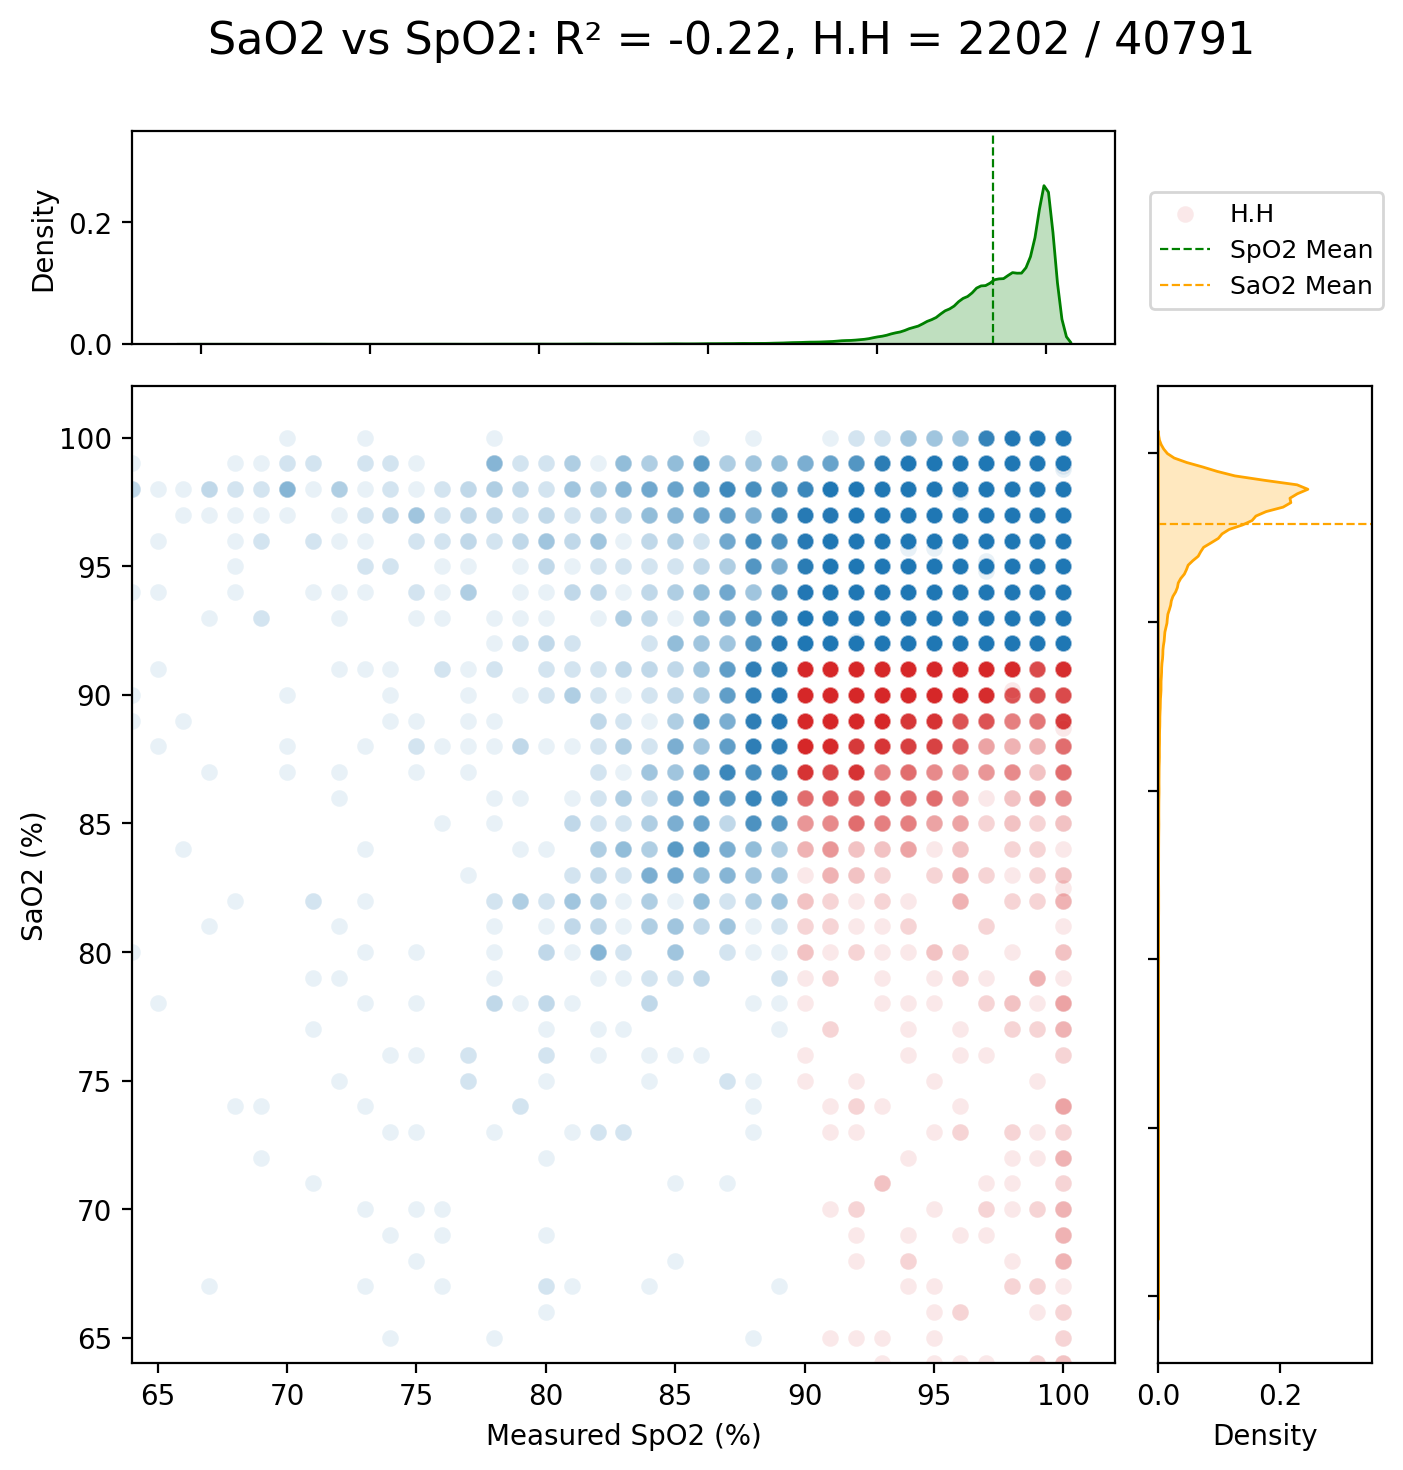

In [ ]:
sao2_spo2_plot(cleaned_2_df, SaO2_HH=92, SpO2_HH=90, lbl_text="Measured")

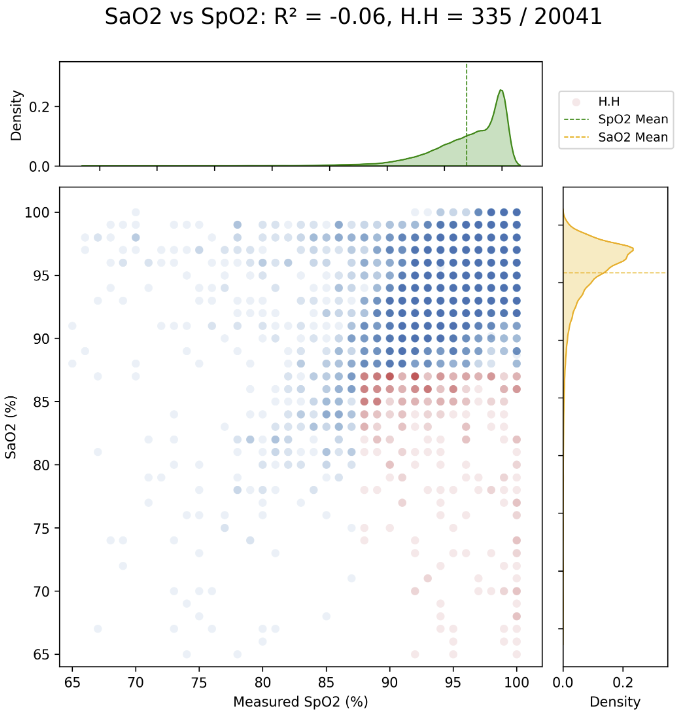

#### Measurements Distributions

In [ ]:
def sao2_spo2_dists(data, races):

  fig, ax = plt.subplots(len(races), 1, sharex= True, sharey=True,
                        figsize=(2 * len(races), 5))

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SaO2, ax=ax[i],
                  color='orange', fill=True, label="SaO2")
      sns.kdeplot(x=data[data.race_group == r].SpO2, ax=ax[i],
                  color='green', fill=True, label="SpO2")
      ax[i].set_xlim([90,100])
      ax[i].legend(loc='upper left', ncol=1, fontsize=9)
      ax[i].set_xlabel('O2 Saturation (%)')
      ax[i].set_title(f'{r} Patients')

  fig.suptitle('SaO2 and SpO2 Density Distributions')
  plt.show()

In [ ]:
# Encode Race Groups
vis_df = cleaned_2_df.copy()
vis_df.race_group = vis_df.race_group.apply(lambda x: 'Non-White' if x != 'White' \
                                                              else 'White')

races = vis_df.race_group.unique() #["White", "Non-White"]

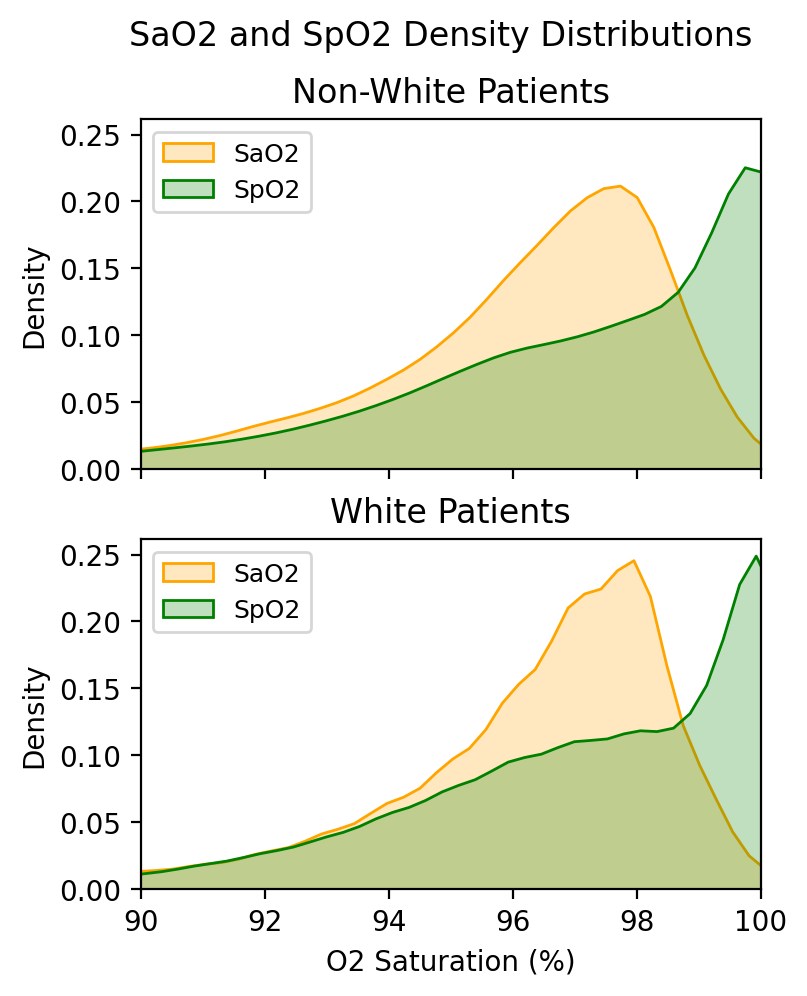

In [ ]:
sao2_spo2_dists(vis_df, races)

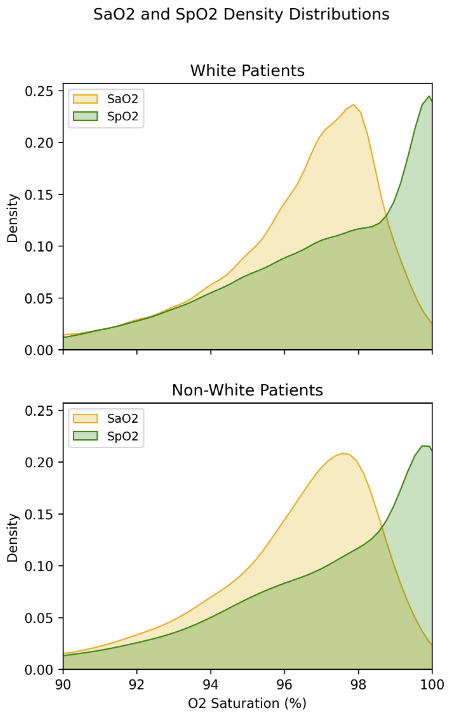

#### Gap Distributions

In [ ]:
def sao2_spo2_gap(data, races, comparison="White vs. Non-White"):

  fig, ax = plt.subplots(1, 1, sharex= True, sharey=True, figsize=(8,4))

  colors = ['green', 'black']

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SpO2 - data[data.race_group == r].SaO2,
                  ax=ax, color=colors[i], fill=True, label=r)
      
  ax.set_xlim([-4,4])
  ax.legend(loc='upper left', ncol=1, fontsize=9)
  ax.set_xlabel('SpO2 - SaO2 (%)')
  ax.set_title(f'SpO2 - SaO2 Gap Distribution, {comparison} Patients')

  plt.show()

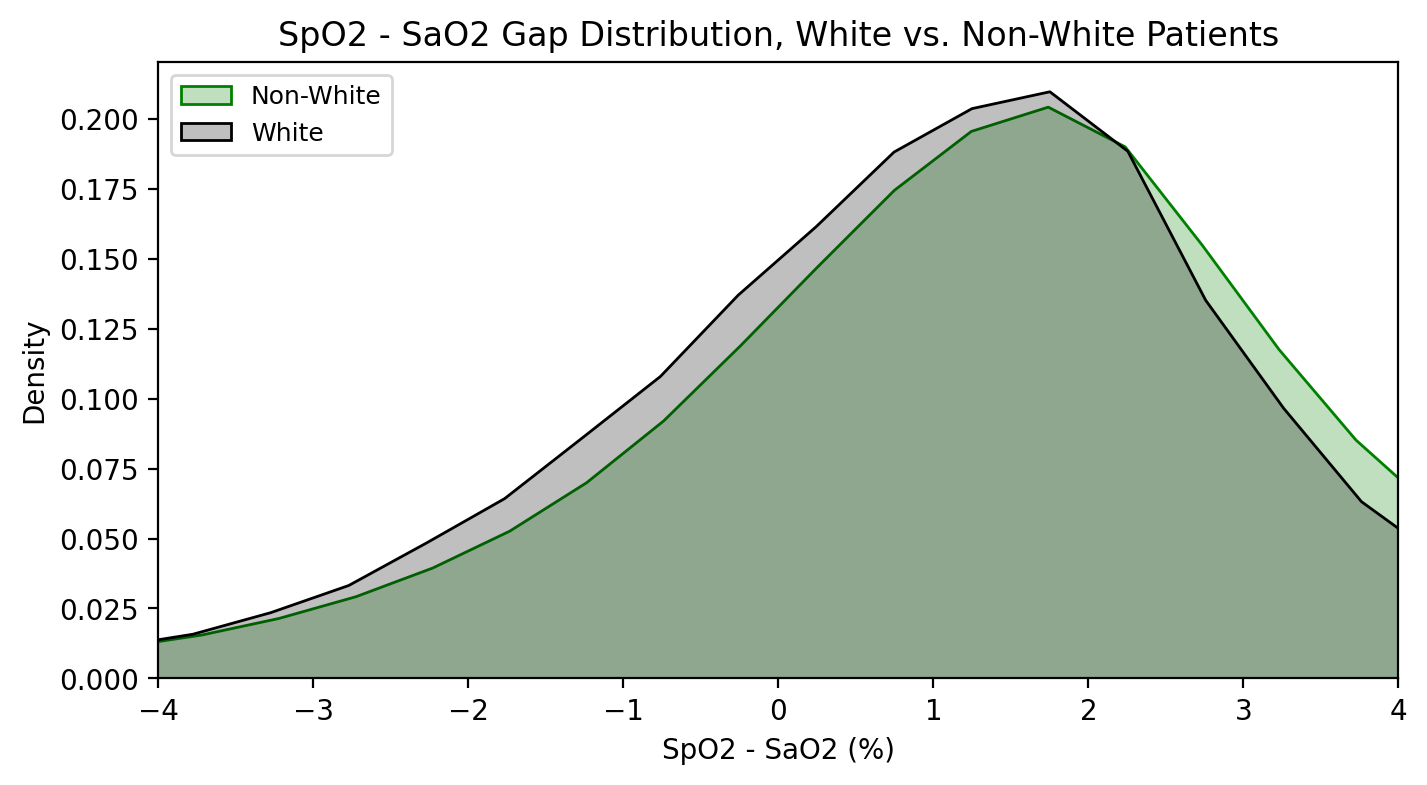

In [ ]:
sao2_spo2_gap(vis_df, races, comparison="White vs. Non-White")

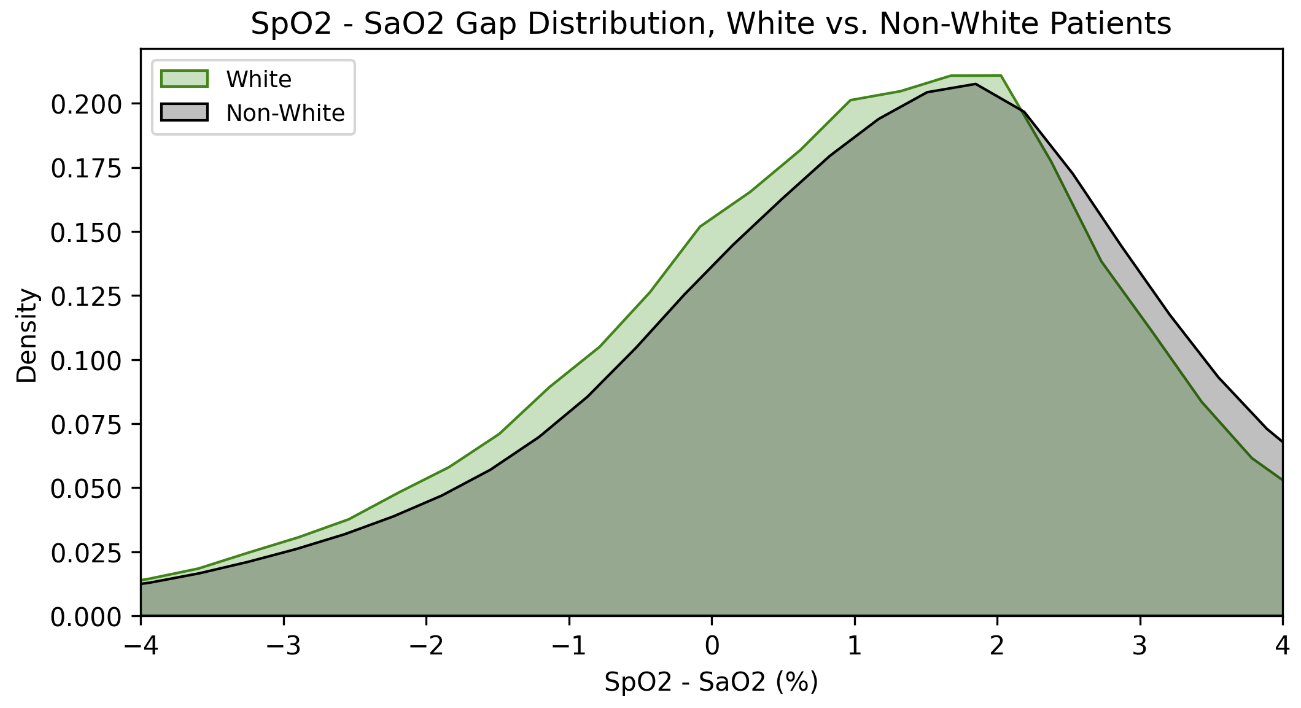

In [ ]:
# Encode Race Groups
vis_df = cleaned_2_df.copy()
vis_df.race_group = vis_df.race_group.apply(lambda x: 'Non-White' if x != 'White' \
                                                              else 'White')

races = vis_df.race_group.unique() #["White", "Non-White"]
vis_df

,level_0,index,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,...,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm,hidden_hypoxemia_90,hidden_hypoxemia_92_90
0,0,0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,...,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm),1,1
1,2,2,10002013,39060235,2160-05-18 16:03:00,99.0,0,99,0,23581541,...,-2.0,14.0,-3.0,36.90,0.0,155.0,-3.0,SR (Sinus Rhythm),0,0
2,7,7,10002428,38875437,2156-04-19 19:41:00,96.0,-11,94,0,28662225,...,4.0,22.0,-56.0,37.00,2.0,183.0,19.0,ST (Sinus Tachycardia),0,0
3,8,8,10002428,38875437,2156-04-20 00:46:00,97.0,0,100,0,28662225,...,-1.0,18.0,14.0,36.94,164.0,163.0,14.0,SR (Sinus Rhythm),0,0
4,9,9,10002428,38875437,2156-04-20 03:42:00,97.0,-16,98,0,28662225,...,3.0,20.0,18.0,37.39,-12.0,163.0,18.0,SR (Sinus Rhythm),0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40786,81595,81787,19997752,34531437,2128-03-02 17:54:00,97.0,-9,99,0,29452285,...,6.0,17.0,-114.0,36.33,0.0,153.0,6.0,V Paced,0,0
40787,81597,81789,19998330,33428243,2178-11-28 07:14:00,95.0,-14,99,0,24096838,...,-14.0,25.0,46.0,36.50,46.0,175.0,-14.0,AF (Atrial Fibrillation),0,0
40788,81599,81791,19998843,30988867,2187-02-06 05:11:00,98.0,-11,100,0,24842066,...,-11.0,27.0,-11.0,38.90,0.0,142.0,-11.0,SR (Sinus Rhythm),0,0
40789,81600,81792,19999287,35165301,2197-08-07 02:12:00,97.0,-12,98,0,20175828,...,-12.0,16.0,108.0,36.89,-12.0,129.0,-12.0,1st AV (First degree AV Block),0,0


In [ ]:
vis_df.race_group.value_counts()

White        27675
Non-White    13116
Name: race_group, dtype: int64

### ✏️ Further EDA
`Create code below to answer the following questions`


What is the Outcome Distribution? 

In [ ]:
# Code here!

Is it more pronounced across certain groups?

In [ ]:
# Code here!

Add Other Questions that may be relevant

In [ ]:
# Code here!

In [ ]:
# Code here!

## 4. ML Task Definition

​
**We suggest (but not limited to), 4 possible ML tasks:**

* Hidden Hypoxemia Prediction (Classification)
* $SaO_2$ Prediction (Regression)
* $SaO_2 - SpO_2$ Gap Prediction (Regresion)
* $SaO_2 - SpO_2$ Gap Magnitude Prediction (Classification)

Discuss, as a team:

* Which task yields more value to tackle the presented problem?

* Which task is more prone to errors or biases?

* Where do we have more information?

* Where is there more outcome imbalance?

* Which decision-support algorithm would not harm patients further?

* How will the evaluation be done if we pick a certain task?

* Can we solve more than one task at once?


**Keep in mind that there is no right answer!**
​

### ✏️ Pick one!

`Pick one, or suggest your own:`